In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from atus_analysis import *

In [17]:
%matplotlib inline

In [18]:
summary = pd.read_csv("../atusdata/atussum_2013.dat")
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 36.0 MB


In [19]:
#merging cps file

In [20]:
cps_data = pd.read_csv("../atusdata/atuscps_2013.dat")
cps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67855 entries, 0 to 67854
Columns: 375 entries, TUCASEID to PRDASIAN
dtypes: float64(2), int64(373)
memory usage: 194.7 MB


In [21]:
cps_sub_data = cps_data.loc[:, ['TUCASEID', 'TULINENO', 'GESTFIPS', 'HEFAMINC', 'HETENURE', 'PREMPHRS', 'PRMJIND1']]

In [22]:
cps = cps_sub_data[cps_sub_data['TULINENO'] == 1]
cps.head()

,TUCASEID,TULINENO,GESTFIPS,HEFAMINC,HETENURE,PREMPHRS,PRMJIND1
0,20130101130004,1,53,16,1,0,-1
7,20130101130046,1,26,6,2,18,4
8,20130101130086,1,12,16,1,22,8
10,20130101130112,1,48,15,1,18,13
13,20130101130123,1,36,15,1,0,-1


In [23]:
cps.pop('TULINENO')

0        1
7        1
8        1
10       1
13       1
15       1
16       1
18       1
19       1
20       1
22       1
25       1
26       1
28       1
30       1
33       1
37       1
41       1
43       1
45       1
46       1
47       1
49       1
51       1
55       1
57       1
60       1
61       1
62       1
71       1
        ..
67783    1
67787    1
67789    1
67791    1
67792    1
67794    1
67795    1
67797    1
67800    1
67804    1
67806    1
67807    1
67809    1
67810    1
67811    1
67812    1
67815    1
67817    1
67819    1
67822    1
67824    1
67828    1
67835    1
67837    1
67839    1
67843    1
67844    1
67846    1
67848    1
67851    1
Name: TULINENO, dtype: int64

In [24]:
cps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24774 entries, 0 to 67851
Data columns (total 6 columns):
TUCASEID    24774 non-null int64
GESTFIPS    24774 non-null int64
HEFAMINC    24774 non-null int64
HETENURE    24774 non-null int64
PREMPHRS    24774 non-null int64
PRMJIND1    24774 non-null int64
dtypes: int64(6)
memory usage: 1.3 MB


In [25]:
merged_data = pd.merge(summary, cps, left_on='tucaseid', right_on='TUCASEID')

In [26]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 419 entries, tucaseid to PRMJIND1
dtypes: float64(1), int64(418)
memory usage: 36.5 MB


In [28]:
waiting_list = ['030111', '030303', '030405', '030504', '040111', 
'040405', '040508', '050104', '050205', '050305', '050404', '060103', 
'060303', '060403', '070105', '080203', 
'080403', '080502', '080602', '080702', '090202', '090302', 
'090502', '100304', '110201',
'120501', '120503', '120504', '120599', '130301', '130302',
'140103', '150701', '160201']
waiting_answers= {i: average_minutes(merged_data, i) for i in waiting_list}

In [29]:
waiting_answers

{'030111': 0.38717616859139453,
 '030303': 0.082369831393028087,
 '030405': 0.091707296709121672,
 '030504': 0.19015990038606193,
 '040111': 0.017848269614560212,
 '040405': 0.0576432431937055,
 '040508': 0.17281711284196397,
 '050104': 0.19432907089973356,
 '050205': 0.0018193128498150048,
 '050305': 0.0013779347880287739,
 '050404': 0.0010366209885637097,
 '060103': 0.052633365849458061,
 '060303': 0.002083902616290702,
 '060403': 0.0054865319287359503,
 '070105': 0.07003617379104822,
 '080203': 0.0035444436511786752,
 '080403': 0.49404662389226051,
 '080502': 0.089711154166960058,
 '080602': 0.0012768093949666376,
 '080702': 0.05672850970386565,
 '090202': 0.11771792064659949,
 '090302': 0.0010932822594575241,
 '090502': 0.16255240041665595,
 '100304': 0.053587013368066122,
 '110201': 0.1847968970305009,
 '120501': 0.0057014444355727592,
 '120503': 0.0049712299035683501,
 '120504': 0.015218862396973608,
 '120599': 0.0048136795706008135,
 '130301': 0.013714170974709353,
 '130302': 0.

In [30]:
waiting_data = pd.Series(waiting_answers) #.items(), columns=['id', 'mins'])

In [31]:
all_waiting_times = pd.DataFrame(waiting_data, columns=["minutes"])
all_waiting_times

,minutes
030111,0.387176
030303,0.082370
030405,0.091707
030504,0.190160
040111,0.017848
040405,0.057643
040508,0.172817
050104,0.194329
050205,0.001819
050305,0.001378


In [34]:
all_waiting_times.index = all_waiting_times.index.to_series().map(lambda code: replace_code(code))

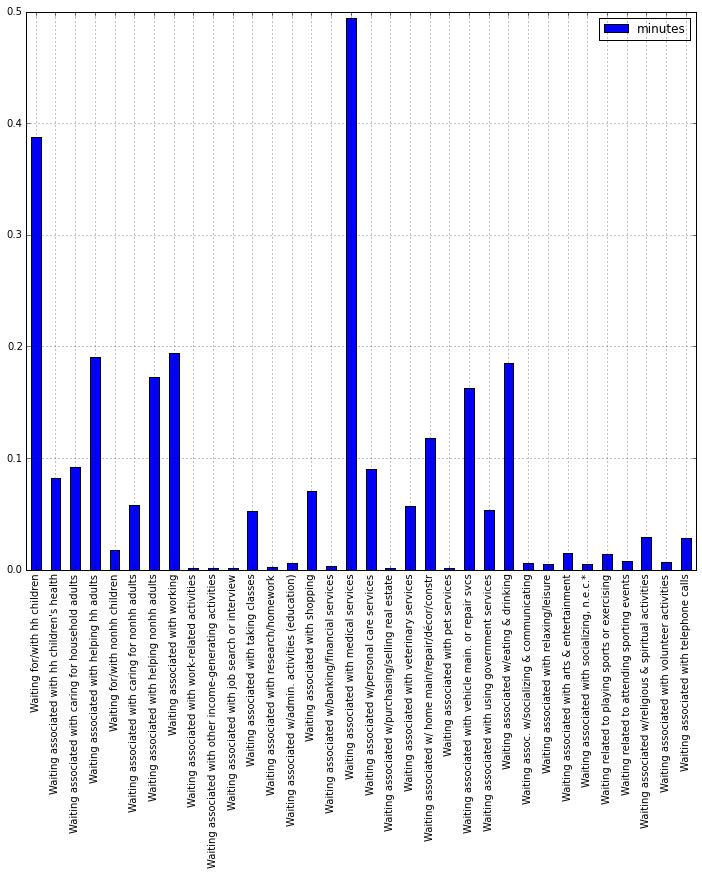

In [40]:
all_waiting_times.plot(kind='bar', figsize=(12,10))

In [41]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 419 entries, tucaseid to PRMJIND1
dtypes: float64(1), int64(418)
memory usage: 36.5 MB


In [45]:
home_main = merged_data[merged_data['t090201'] > 0]

In [51]:
home_main.t090202

31        0
231       0
461       0
477       0
1032      0
3497      0
3828      0
4368      0
4884      0
4886     15
5979      0
6386      0
6530      0
6597      0
6736      0
6776      0
6869      0
7294      0
7325      0
8315      0
8620      0
9261      0
9745      0
10196     0
10242     0
10321     0
10539    10
10562     0
Name: t090202, dtype: int64

In [28]:
wa = [(key >= 0.1) for key, value in waiting_answers]

In [29]:
wa

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True]

In [ ]:
merged_data.head()

In [ ]:
#states_dict = {i: merged_data[merged_data['GESTFIPS'] == i] for i in range(56)}

In [ ]:
#states_dict[3]

In [13]:
merged_data.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t500103,t500105,t500106,t500107,TUCASEID,GESTFIPS,HEFAMINC,HETENURE,PREMPHRS,PRMJIND1
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,20130101130004,53,16,1,0,-1
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,20130101130112,48,15,1,18,13
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,0,0,0,0,20130101130123,36,15,1,0,-1
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,20130101130611,12,13,1,21,10
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,20130101130616,26,6,1,13,12


In [16]:
nc = merged_data[merged_data['GESTFIPS'] == 37]

In [20]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 8 to 11211
Columns: 419 entries, tucaseid to PRMJIND1
dtypes: float64(1), int64(418)
memory usage: 1.1 MB


In [17]:
nc.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t500103,t500105,t500106,t500107,TUCASEID,GESTFIPS,HEFAMINC,HETENURE,PREMPHRS,PRMJIND1
8,20130101130734,1378191.194810,-1,57,2,34,2,2,1,1,...,0,0,0,0,20130101130734,37,5,2,17,9
164,20130111120971,21645455.510258,14,35,1,39,2,2,2,1,...,0,0,0,0,20130111120971,37,9,2,18,6
167,20130111121006,8827580.302387,-1,64,1,43,1,2,1,1,...,0,0,0,0,20130111121006,37,16,1,2,8
250,20130111121896,12400702.893819,6,25,2,42,2,2,2,4,...,0,0,0,0,20130111121896,37,1,2,0,-1
270,20130111122234,19758777.197626,-1,54,2,39,1,2,1,1,...,0,0,0,0,20130111122234,37,13,1,19,9


In [18]:
cali = merged_data[merged_data['GESTFIPS'] == 6]

In [21]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 6 to 11382
Columns: 419 entries, tucaseid to PRMJIND1
dtypes: float64(1), int64(418)
memory usage: 3.7 MB


In [19]:
cali.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t500103,t500105,t500106,t500107,TUCASEID,GESTFIPS,HEFAMINC,HETENURE,PREMPHRS,PRMJIND1
6,20130101130658,5671341.270490,-1,72,1,42,1,1,1,5,...,0,0,0,0,20130101130658,6,14,1,0,-1
35,20130101131179,1615210.298718,-1,61,2,44,1,2,1,1,...,0,0,0,0,20130101131179,6,12,2,22,9
54,20130101131512,1552575.923818,-1,68,2,40,1,2,1,5,...,0,0,0,0,20130101131512,6,14,1,0,-1
56,20130101131541,14395170.154470,-1,57,1,40,1,2,1,4,...,0,0,0,0,20130101131541,6,12,1,0,-1
66,20130101131664,4780823.505048,11,53,1,46,4,2,1,1,...,0,0,0,0,20130101131664,6,16,1,19,4


In [22]:
cali_work = average_minutes(cali, '050101')

In [23]:
cali_work

169.75131098786463

In [24]:
nc_work = average_minutes(nc, '050101')

In [25]:
nc_work

176.6509275542048

In [26]:
cali_sleep = average_minutes(cali, '010101')

In [28]:
cali_sleep/60

8.8652805037311495

In [31]:
nc_sleep = average_minutes(nc, '010101')

In [32]:
nc_sleep/60

8.7134636175540141

In [33]:
cali_pet_care = average_minutes(cali, '020601')

In [35]:
cali_pet_care

1.9182010924581958

In [38]:
nc_pet_care = average_minutes(nc, '020601')

In [39]:
nc_pet_care

3.4530511360173985

In [45]:
cali_travel = average_minutes2(cali, '1805')

/Users/trippshealy/iron_yard/week4/atus-analysis/atus-analysis/atus_analysis.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['minutes'] = activity_sums


In [49]:
cali_travel

16.402799560346164

In [47]:
nc_travel = average_minutes2(nc, '1805')

/Users/trippshealy/iron_yard/week4/atus-analysis/atus-analysis/atus_analysis.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['minutes'] = activity_sums


In [50]:
nc_travel

14.863148289259964

In [51]:
cali_sports = average_minutes2(cali, '1301')

/Users/trippshealy/iron_yard/week4/atus-analysis/atus-analysis/atus_analysis.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['minutes'] = activity_sums


In [52]:
cali_sports

22.271018696837221

In [53]:
nc_sports = average_minutes2(nc, '1301')

/Users/trippshealy/iron_yard/week4/atus-analysis/atus-analysis/atus_analysis.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['minutes'] = activity_sums


In [54]:
nc_sports

24.41346092301119

In [55]:
cali_religion = average_minutes2(cali, '14')

/Users/trippshealy/iron_yard/week4/atus-analysis/atus-analysis/atus_analysis.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['minutes'] = activity_sums


In [56]:
cali_religion

10.042431290475218

In [57]:
nc_religion = average_minutes2(nc, '14')

/Users/trippshealy/iron_yard/week4/atus-analysis/atus-analysis/atus_analysis.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['minutes'] = activity_sums


In [58]:
nc_religion

9.868774655750979